In [77]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')


dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [78]:
# import the yr1c1c1 labels
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

# Datasets: BOW and TF-IDF

In [63]:

# -- TF-IDF ---
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))
print(len(X_t[1]))
X_t = X_t[1]
print(len(X_t))
print(X_t)
y_t = df['ReasoningLevel'].tolist()
print(len(y_t))
print(y_t)

# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b1 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b1)
y_b = lb.transform(y_b1)


83
83
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611256 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.012804   0.         0.012804  ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
83
['the', 'bal', 'bal', 'bal', 'none', 'bal', 'the', 'the', 'exp', 'the', 'the', 'the', 'exp', 'exp', 'bal', 'bal', 'bal', 'bal', 'bal', 'the', 'the', 'bal', 'bal', 'exp', 'exp', 'bal', 'the', 'the', 'bal', 'the', 'exp', 'exp', 'the', 'none', 'the', 'bal', 'the', 'the', 'bal', 'none', 'none', 'the', 'the', 'bal', 'none', 'the', 'bal', 'exp', 'bal', 'none', 'bal', 'the', 'the', 'the', 'the', 'the', 'the', 'exp', 'bal', 'bal', 'exp', 'exp', 'none', 'exp', 'the', 'the', 'bal', 'exp', 'the', 'the', 'none', 'the', 'bal', 'bal', 'none', 'none', 'the

C:\Users\EfiaA\AppData\Local\Temp\ipykernel_22964\113418574.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))


# Mock NN for loss function

In [65]:
# --- splitting tfidf data -- 
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.8)
X_t.shape
print(len(y_t))

83


In [66]:
# --- splitting bow data -----
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = 0.8)
input = X_train_b.shape[1] # input for NN
#

In [43]:
#---- Neural network function -----
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(20, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history


nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                94320     
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
 flatten_7 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 94,341
Trainable params: 94,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 135ms/step - loss: 5.0774 - accuracy: 0.2500 - val_loss: 1.1478 - val_accuracy: 0.3026
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.8390 - accuracy: 0.5329 - val_loss: 0.8195 - val_accuracy: 0.7500
Epoch 3/1000
3/3 [=============

In [44]:
# --- getting the accuracy values ----
acc = nn1.history['accuracy']

# --- put in a pandas dataframe  ----
accu_val  = pd.DataFrame(acc, columns= ['accuracy'])

# --- mean and standard error mean values (sem) ---
mean_val_acc= sum(acc)/len(acc)
sem_val     = sem(acc)

# Neural Network (NN) function and plot

In [45]:
# ---- FE and ML labels used ----
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] 

In [76]:
def NN_dataframe(X, y,t_size,epoch_no,str_dataname,str_featext,str_year,dir):
    accuracies = []
    accuracies_sem = []
    dummy = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])

    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))

    dict_rl = {'trainsize':train_sizes, 'accuracy':accuracies, 'sem': accuracies_sem}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year), dir)
    name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow, name


def plot(dframe_train, dframe_acc, dframe_sem):
    plt.plot(dframe_train, dframe_acc, 'o')
    plt.errorbar(dframe_train, dframe_acc, yerr = dframe_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')

    # save figure 
    # filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
    # plt.savefig(filepath)
    return
        



# Reasoning Level - BOW

In [50]:
acc_RL_bow            = NN_dataframe(wordvec_counts, y_b, train_sizes, 1000, 'Epist', 'BOW', 'y1c1c2', dir_name_e)
acc_RL_bow_df         = acc_RL_bow[0]
RL_bow_picklefilename = acc_RL_bow[1]

ValueError: Found input variables with inconsistent numbers of samples: [83, 95]

In [27]:
#===========================================================================================================================================
#                                                               UNPICKLE: RL-BOW
#===========================================================================================================================================
unpickled_rl_bow_df = utils.load_pickle_file_to_df(RL_bow_picklefilename ,dir_name_e)

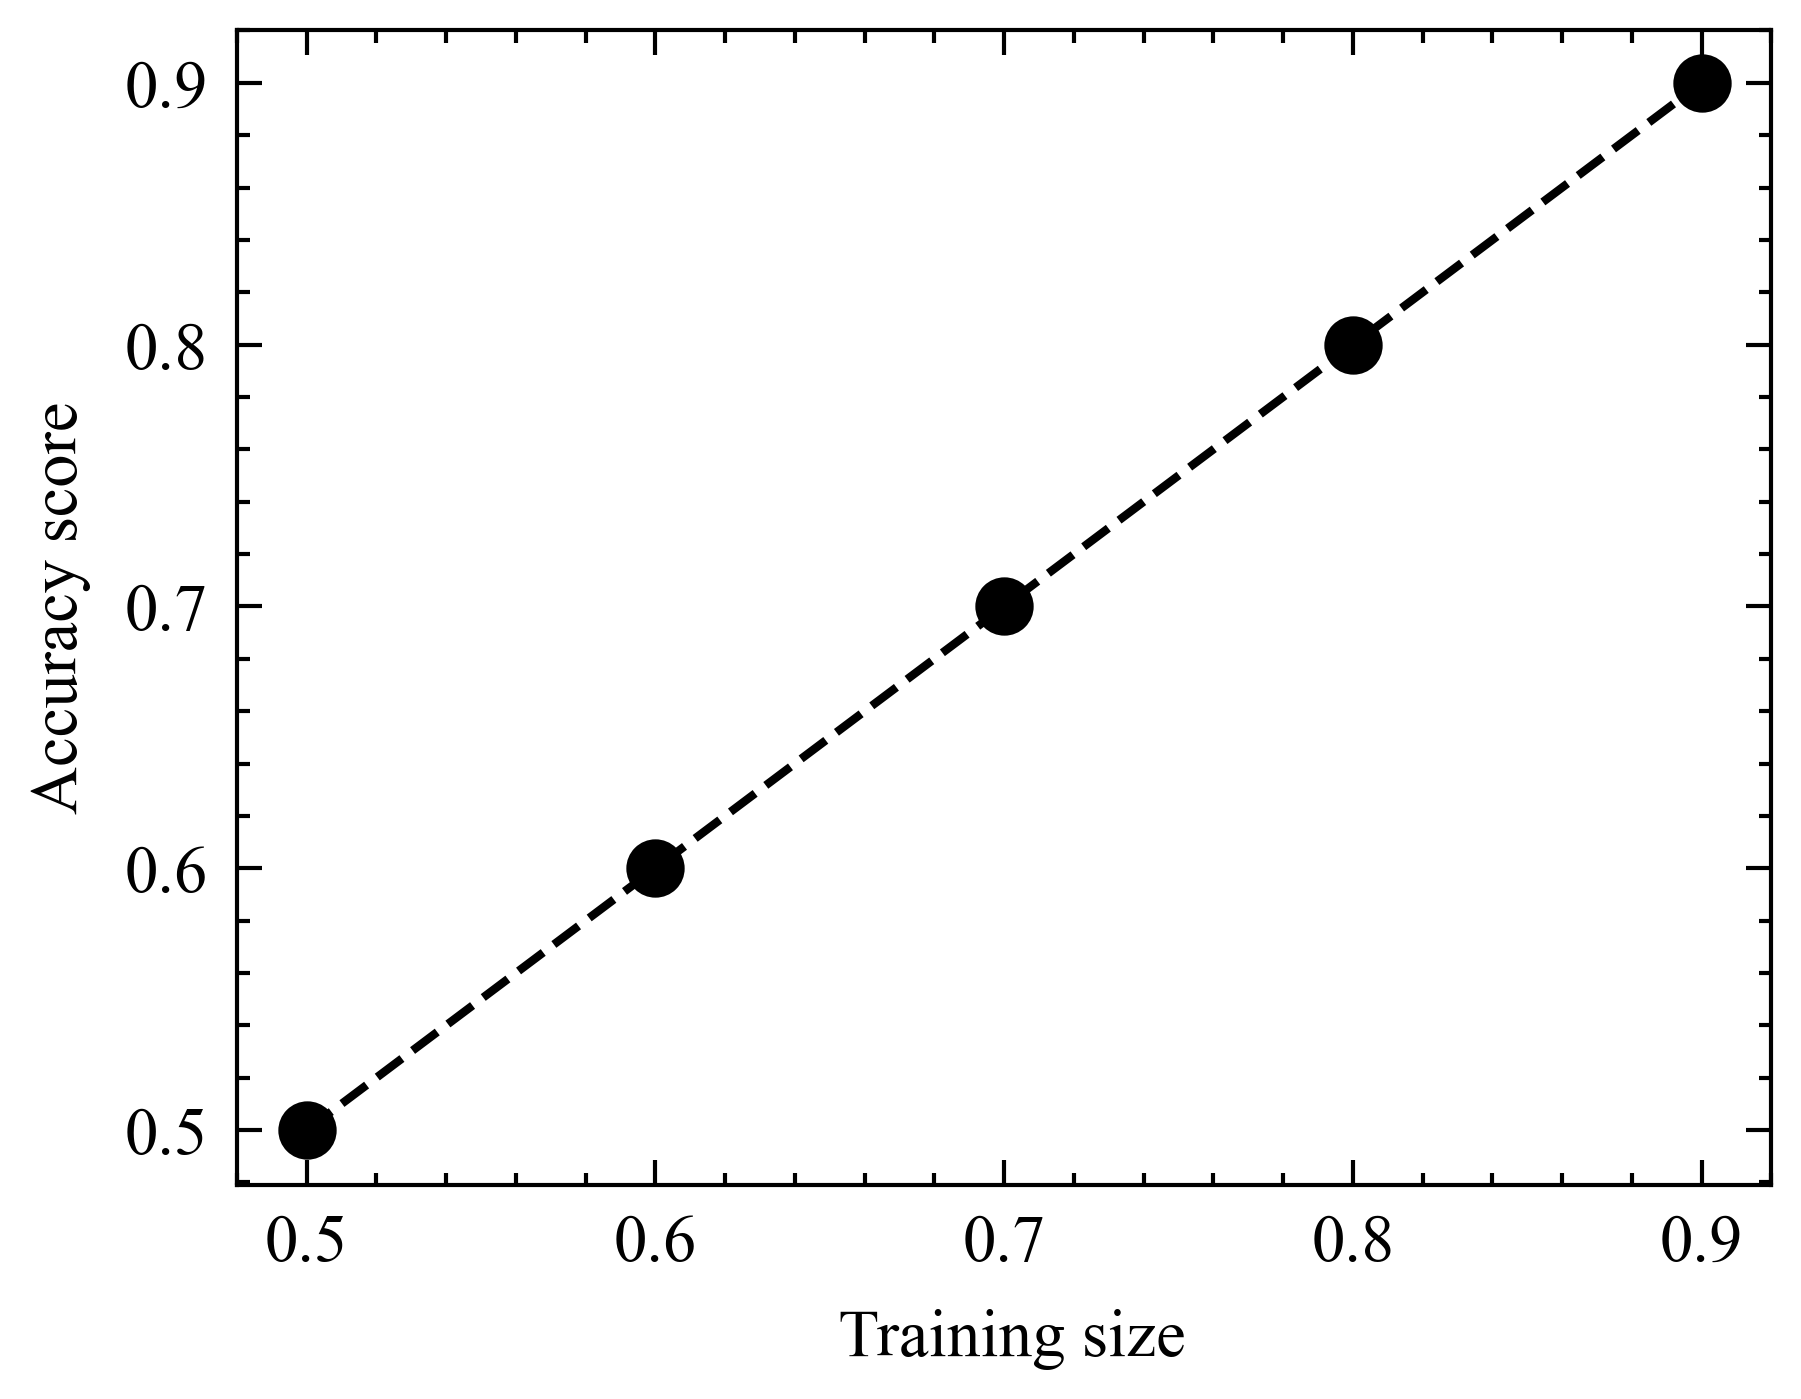

In [28]:
acc_plot_RL = plot(unpickled_rl_bow_df['trainsize'], unpickled_rl_bow_df['accuracy'], unpickled_rl_bow_df['sem'])

# Argument Level - BOW

In [15]:
# -- Bag of Words --- Argument level
wordvec_names_a, wordvec_counts_a= ml_tools.BoW(df['Content'].tolist())
y_b_al = df['ArgumentLevel'].tolist()

# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b_al)
y_b_al= lb.transform(y_b_al)

acc_AL_bow            = NN_dataframe(wordvec_counts_a, y_b_al, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_AL_bow_df         = acc_AL_bow[0]
AL_bow_picklefilename = acc_AL_bow[1]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                47160     
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
 flatten_7 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 179ms/step - loss: 1.5223 - accuracy: 0.8000 - val_loss: 0.7125 - val_accuracy: 0.7875
Epoch 2/1000
2/2 [==============================] - 0s 38ms/step - loss: 0.8088 - accuracy: 0.6468 - val_loss: 0.8590 - val_accuracy: 0.5375
Epoch 3/1000
2/2 [=============

# Argument Level - BOW

In [80]:
#===========================================================================================================================================
#                                                               UNPICKLE: AL-BOW
#===========================================================================================================================================
unpickled_al_bow = utils.load_pickle_file_to_df(AL_bow_picklefilename, dir_name_e)


NameError: name 'AL_bow_picklefilename' is not defined

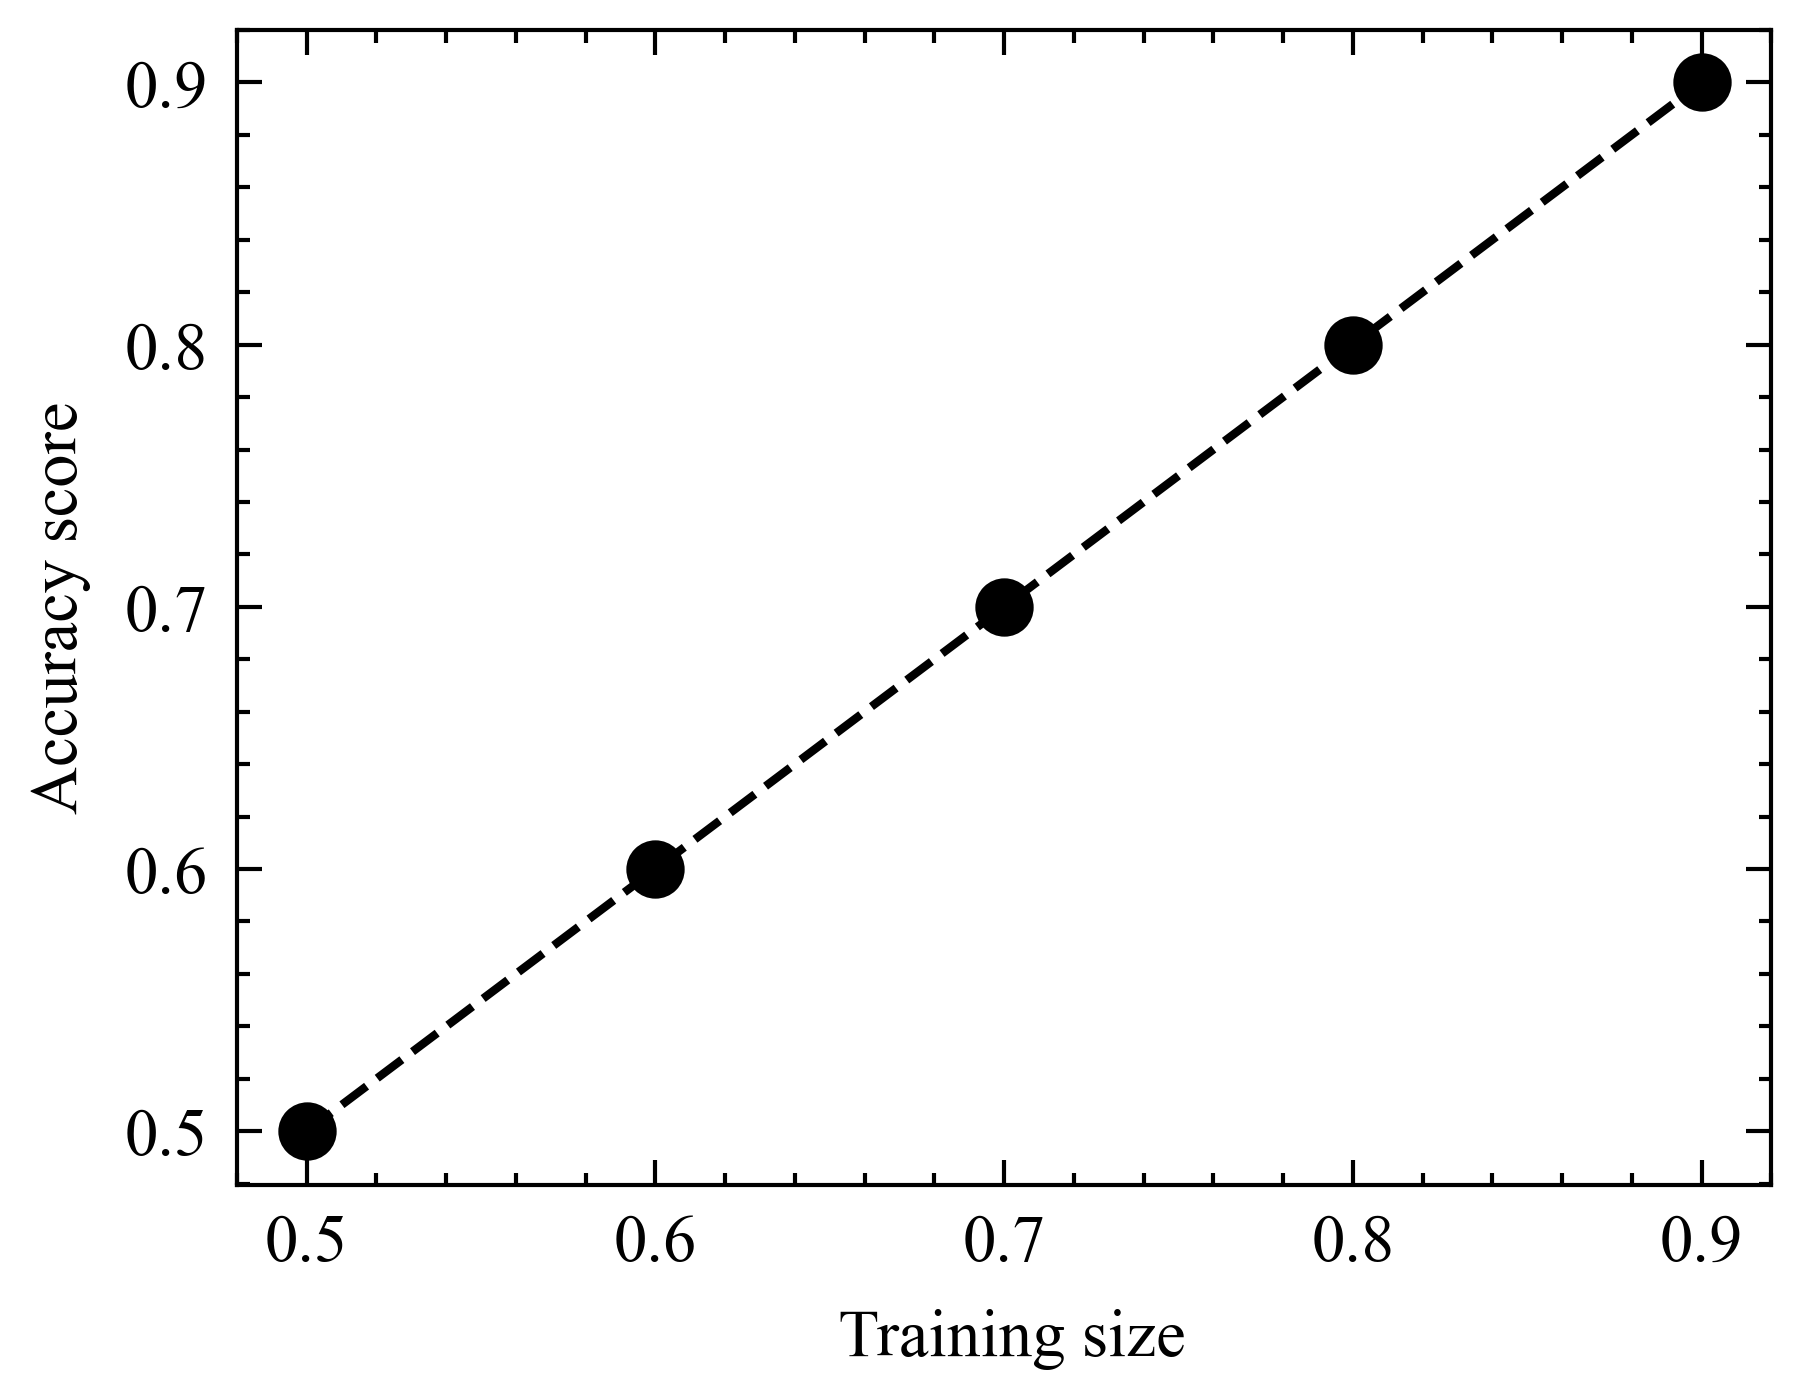

In [17]:
acc_plot_AL = plot(unpickled_al_bow['trainsize'], unpickled_al_bow['accuracy'], unpickled_al_bow['sem'])

# TF-IDF Epistomology - RL

In [33]:
# -- Feature extraction: TF-IDF, RL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t = df['ReasoningLevel'].tolist()

# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)
acc_TFIDF_bow              = NN_dataframe(X_t, y_t, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_TFIDF_bow_df           = acc_AL_bow[0]
RL_TFIDF_picklefilename    = acc_AL_bow[1]
# -- unpickled reasoning level tfidf
unpickled_rl_tfidf = utils.load_pickle_file_to_df(RL_TFIDF_picklefilename,dir_name_e)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                47160     
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
 flatten_28 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 187ms/step - loss: 0.6957 - accuracy: 0.3883 - val_loss: 0.6861 - val_accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.6834 - accuracy: 0.7394 - val_loss: 0.6763 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [============

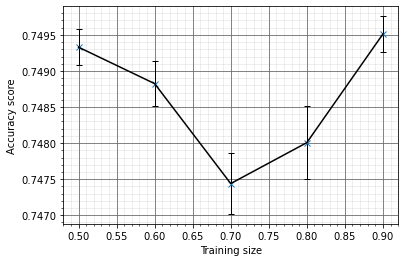

In [49]:
acc_plot_RL_tfidf = plot(unpickled_rl_tfidf['trainsize'], unpickled_rl_tfidf['accuracy'], unpickled_rl_tfidf['sem'])

# TF-IDF Epistomology - AL

In [42]:
# -- Feature extraction: TF-IDF, AL ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t2= df['ArgumentLevel'].tolist()
# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t2)
y_t2 = lb.transform(y_t2)

# ---  NN training, pickling  --- 
acc_al_tfidf            =  NN_dataframe(X_t, y_t2, train_sizes, 1000, 'AL', 'BOW', 'y1c1c2', dir_name_e)
acc_al_tfidf_df         = acc_al_tfidf[0]
AL_TFIDF_picklefilename = acc_al_tfidf[1]
unpickled_al_tfidf      = utils.load_pickle_file_to_df(AL_TFIDF_picklefilename,dir_name_e)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                47160     
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
 flatten_6 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


ValueError: in user code:

    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\EfiaA\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 4715), found shape=(None, 5451)


In [81]:
plot_tfidf_al = plot(unpickled_al_tfidf['trainsize'], unpickled_al_tfidf['accuracy'], unpickled_al_tfidf['sem'])

NameError: name 'unpickled_al_tfidf' is not defined

No handles with labels found to put in legend.


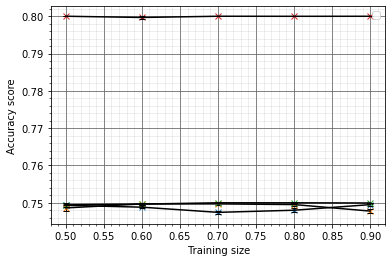

In [53]:
# --- All graphs on one plot
plt.plot(train_sizes, accuracies, 'x')
plt.errorbar(train_sizes, accuracies, yerr = accuracies_sem, markersize=0.5, capsize=3, elinewidth=1, color = 'black')
plt.plot(train_sizes, accuracies_al, 'x')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_rlt, 'x')
plt.errorbar(train_sizes, accuracies_rlt, yerr = accuracies_sem_rlt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_alt, 'x')
plt.errorbar(train_sizes, accuracies_alt, yerr = accuracies_sem_alt, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('TF-IDF - RL - NN - 1000 epochs')
plt.legend()
#filepath = 'outputs/NN-tfidf-AL-1000 epoch'
#plt.savefig(filepath)

# Year 2 

In [67]:
# import the yr2 labels
dir_csv2 = 'outputs/labels_cleaned_y2.csv'
df = pd.read_csv(dir_csv2, encoding='utf-8')

# -- TF-IDF ---
X_t2 = np.array(ml_tools.tf_idf(df['Content'].tolist()))
X_t2 = X_t2[1]
y_t2 = df['ReasoningLevel'].tolist()

# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b2 = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_b2)
y_b2 = lb.transform(y_b2)

C:\Users\EfiaA\AppData\Local\Temp\ipykernel_22964\1589072265.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t2 = np.array(ml_tools.tf_idf(df['Content'].tolist()))


In [69]:
acc_y2            = NN_dataframe(wordvec_counts, y_b2, train_sizes, 1000, 'RL', 'BOW', 'y2', dir_name_e)
acc_y2_df         = acc_y2[0]
acc_bow_y2        = acc_y2[1]

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 20)                109040    
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
 flatten_13 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 109,061
Trainable params: 109,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 74ms/step - loss: 0.8790 - accuracy: 0.5303 - val_loss: 0.6602 - val_accuracy: 0.7206
Epoch 2/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.7276 - accuracy: 0.7500 - val_loss: 0.7194 - val_accuracy: 0.7500
Epoch 3/1000
3/3 [===========

KeyboardInterrupt: 

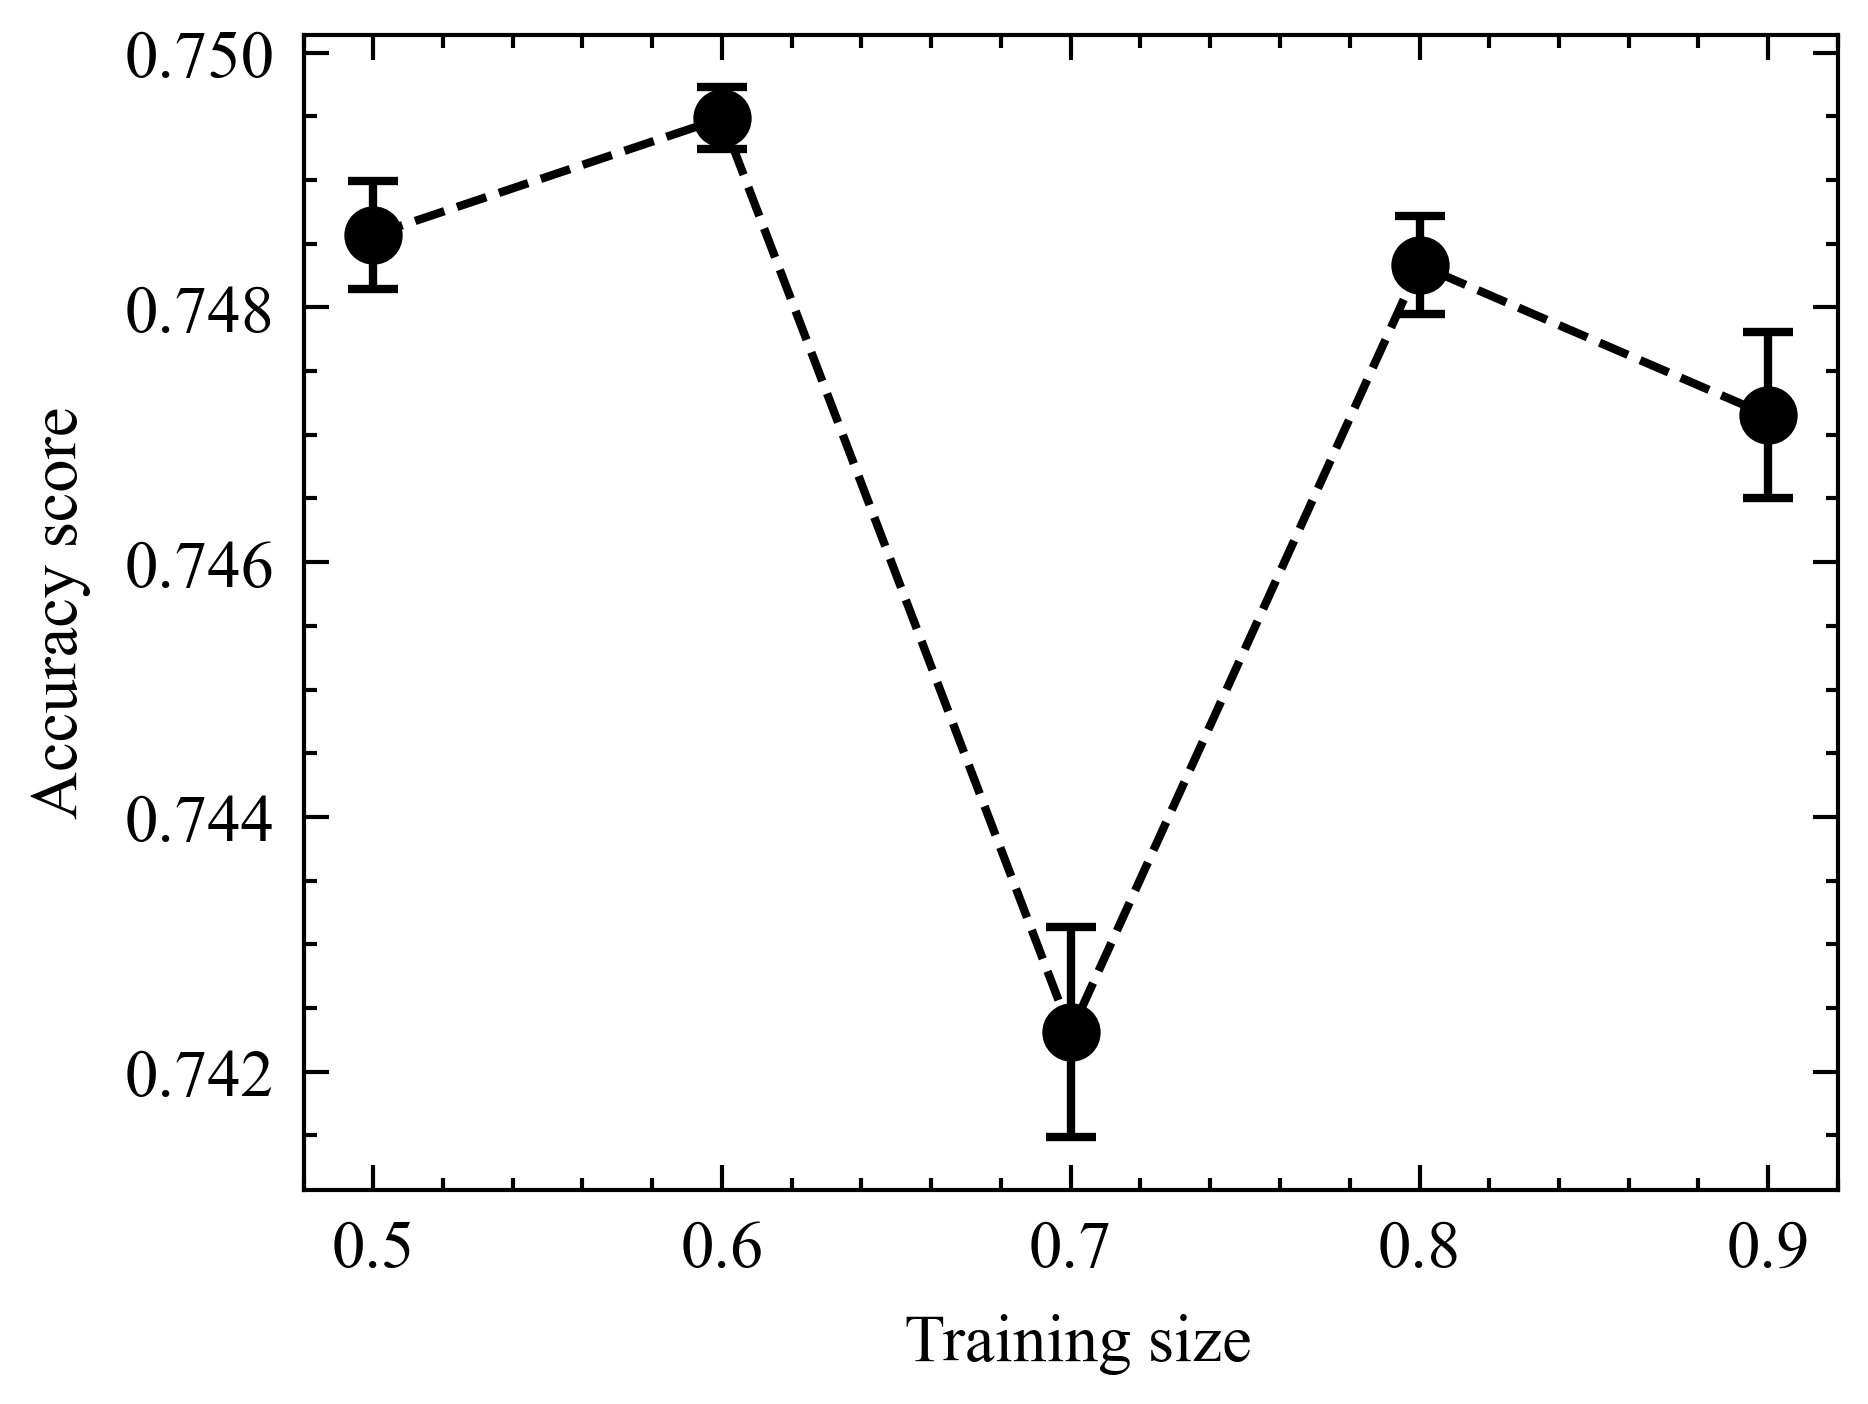

In [79]:
unpickled_y2_bow = utils.load_pickle_file_to_df(acc_bow_y2, dir_name_e)
acc_y2_plot = plot(unpickled_y2_bow['trainsize'], unpickled_y2_bow['accuracy'], unpickled_y2_bow['sem'])